# Importing the libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error

In [2]:
train_df = pd.read_excel('train_set.xlsx')
test_df = pd.read_excel('test_set.xlsx')

# Exploratory data analysis + Feature engineering

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [7]:
df = pd.concat([train_df,test_df])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [9]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [11]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [12]:
df['Date'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[0])
df['Month'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[1])
df['Year'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[2])

In [13]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [15]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],dayfirst=True)

In [16]:
df = df.sort_values('Date_of_Journey')

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
8020,Multiple carriers,2019-03-01,Delhi,Cochin,DEL → BOM → COK,00:20,15:30,15h 10m,1 stop,No info,23170.0,1,3,2019
8957,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:55,05:05 02 Mar,20h 10m,1 stop,1 Long layover,26890.0,1,3,2019
4909,SpiceJet,2019-03-01,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 02 Mar,1h 25m,non-stop,No info,11005.0,1,3,2019
282,Air India,2019-03-01,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 02 Mar,12h 45m,1 stop,No info,NaN,1,3,2019
3853,Air India,2019-03-01,Banglore,New Delhi,BLR → BBI → DEL,09:30,23:45,14h 15m,1 stop,No info,12704.0,1,3,2019


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


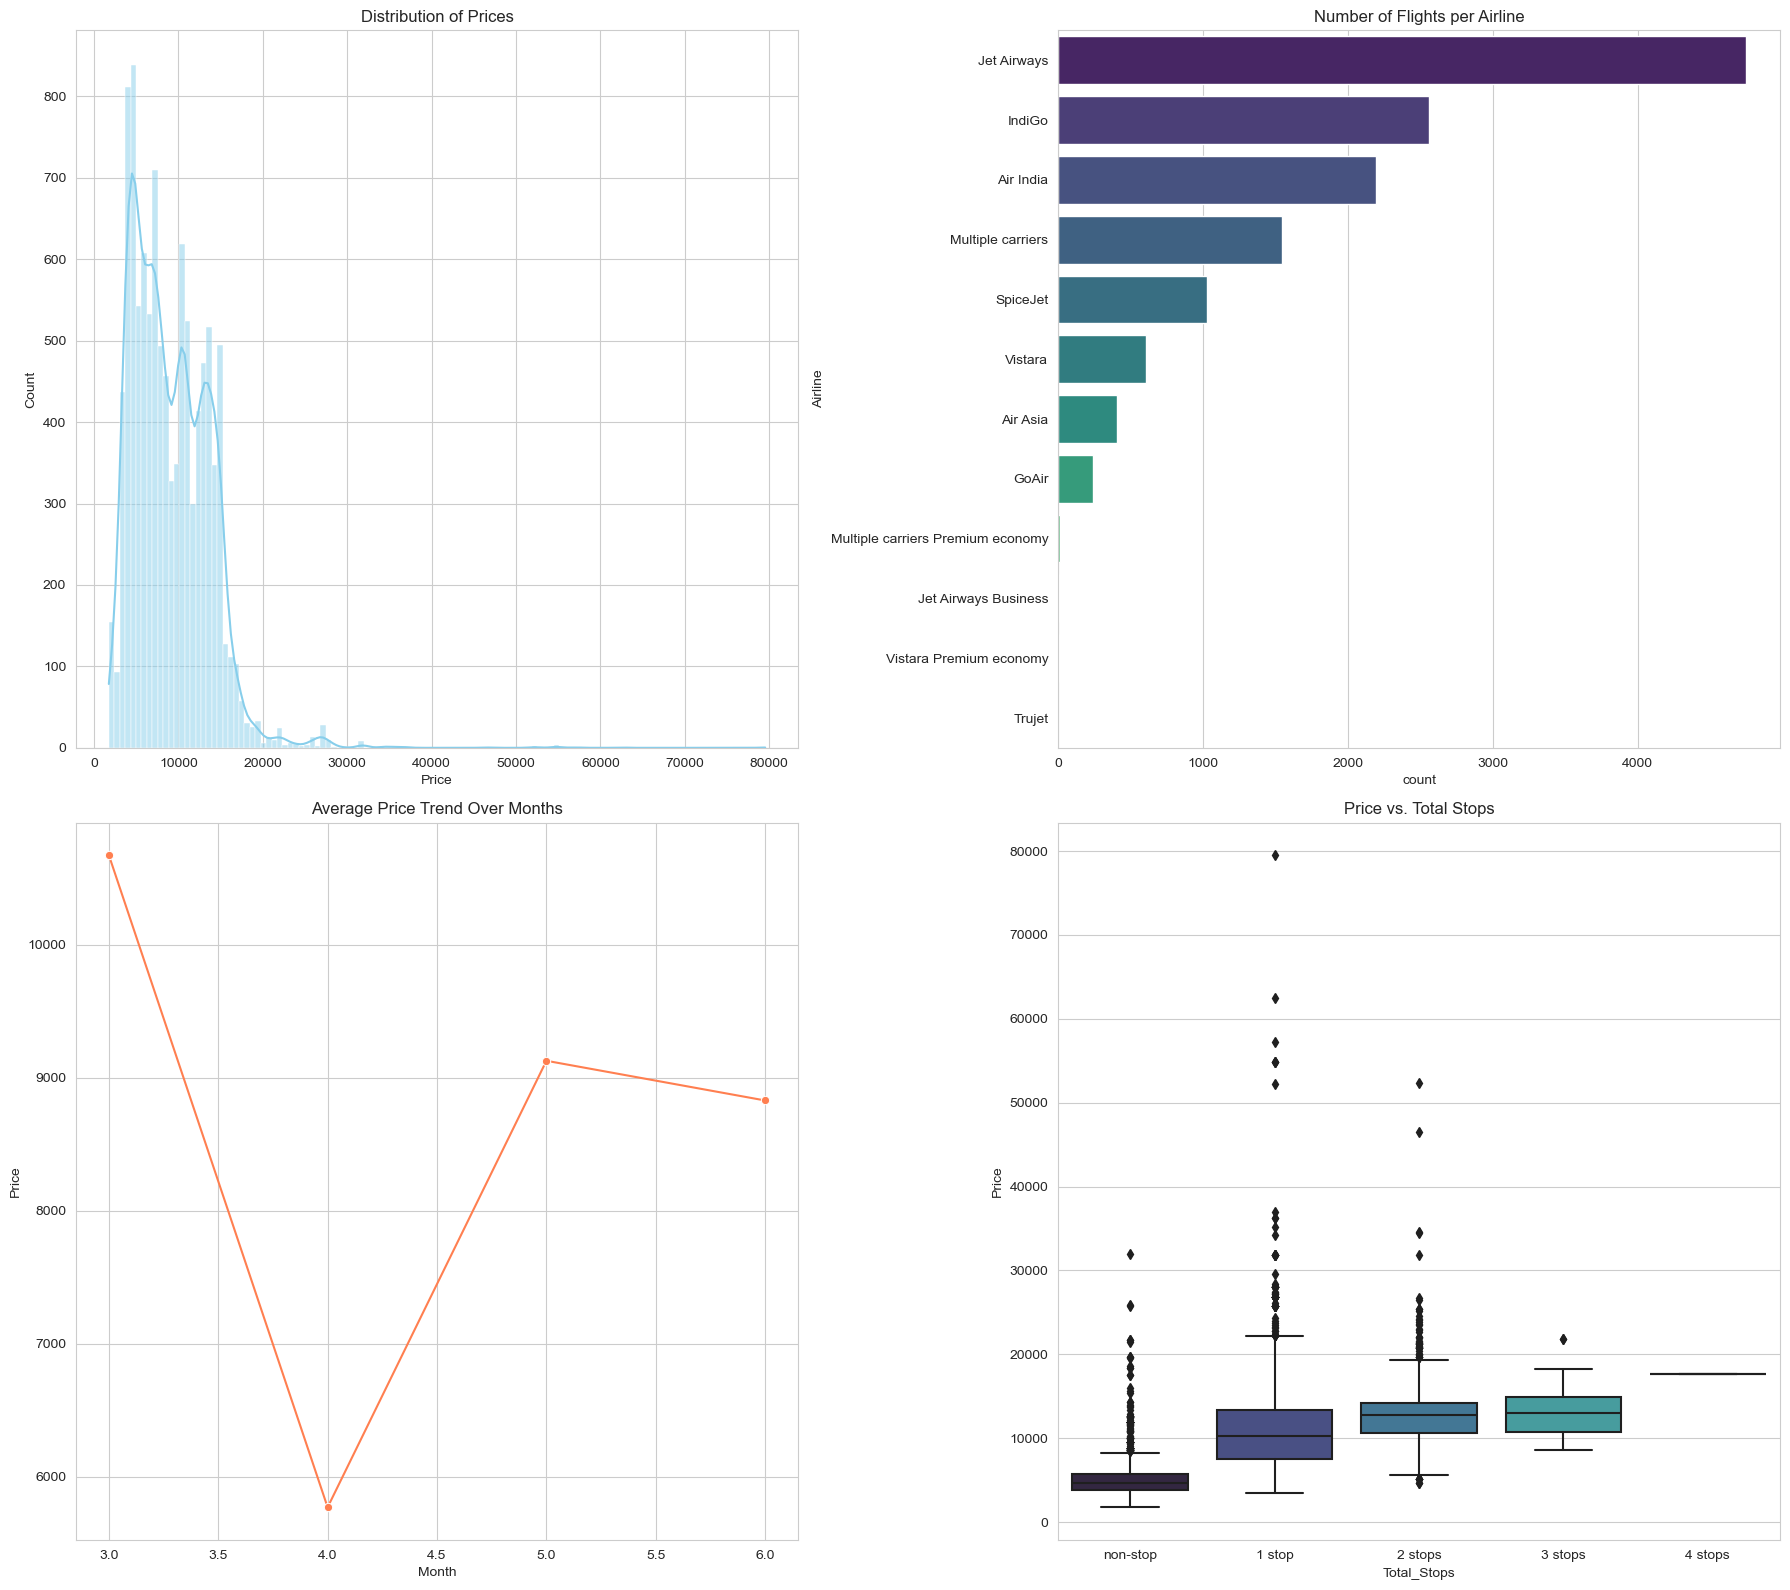

In [18]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(18, 16))

sns.histplot(df['Price'].dropna(), kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Prices')

sns.countplot(y='Airline', data=df, ax=axes[0, 1], order = df['Airline'].value_counts().index, palette='viridis')
axes[0, 1].set_title('Number of Flights per Airline')

df['Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
avg_price_per_month = df.groupby('Month')['Price'].mean().reset_index()
sns.lineplot(x='Month', y='Price', data=avg_price_per_month, ax=axes[1, 0], marker='o', color='coral')
axes[1, 0].set_title('Average Price Trend Over Months')

order = ['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=axes[1, 1], order=order, palette='mako')
axes[1, 1].set_title('Price vs. Total Stops')

plt.tight_layout()

# Data preprocessing

## Handling missing values

In [19]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

Route: 1 missing value

Total_Stops: 1 missing value

Price: 2671 missing values

In [20]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,6,5,2019


Route & Total_Stops: Since there's only 1 missing value in each, and these are related (as we can see above), we can either remove these rows or impute them if the rest of their data is crucial. But we can't impute it, since they're related, moreover given the minimal count, removing might be simplest without significant impact on our dataset's integrity.

Price: This column has a substantial number of missing values. Given that Price is our target variable for prediction, rows with missing Price values are not useful for training predictive models. So, we will simply discard these rows.

In [21]:
df = df.dropna(subset=['Route', 'Total_Stops', 'Price'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 8020 to 6602
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  float64       
 11  Date             10682 non-null  int32         
 12  Month            10682 non-null  int32         
 13  Year             10682 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3

In [23]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

# Data preprocessing

In [24]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', '2 Long layover', 'Change airports',
       'No Info', 'Business class', 'Red-eye flight', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [25]:
df['Additional_Info'] = df['Additional_Info'].apply(lambda x : x.replace('No Info' , 'No info'))

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
8020,Multiple carriers,2019-03-01,Delhi,Cochin,DEL → BOM → COK,00:20,15:30,15h 10m,1 stop,No info,23170.0,1,3,2019
8957,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:55,05:05 02 Mar,20h 10m,1 stop,1 Long layover,26890.0,1,3,2019
4909,SpiceJet,2019-03-01,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 02 Mar,1h 25m,non-stop,No info,11005.0,1,3,2019
3853,Air India,2019-03-01,Banglore,New Delhi,BLR → BBI → DEL,09:30,23:45,14h 15m,1 stop,No info,12704.0,1,3,2019
5710,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:55,00:45 02 Mar,15h 50m,1 stop,No info,26890.0,1,3,2019


In [27]:
df_cleaned = df.drop(['Date', 'Month', 'Year'], axis=1)

df_cleaned['Date_of_Journey'] = pd.to_datetime(df_cleaned['Date_of_Journey'])
df_cleaned['Dep_Time'] = pd.to_datetime(df_cleaned['Dep_Time'], format='%H:%M').dt.time
df_cleaned['Arrival_Time'] = pd.to_datetime(df_cleaned['Arrival_Time'].str.split(' ').str[0], format='%H:%M').dt.time

In [28]:
df_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8020,Multiple carriers,2019-03-01,Delhi,Cochin,DEL → BOM → COK,00:20:00,15:30:00,15h 10m,1 stop,No info,23170.0
8957,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:55:00,05:05:00,20h 10m,1 stop,1 Long layover,26890.0
4909,SpiceJet,2019-03-01,Mumbai,Hyderabad,BOM → HYD,22:45:00,00:10:00,1h 25m,non-stop,No info,11005.0
3853,Air India,2019-03-01,Banglore,New Delhi,BLR → BBI → DEL,09:30:00,23:45:00,14h 15m,1 stop,No info,12704.0
5710,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:55:00,00:45:00,15h 50m,1 stop,No info,26890.0


In [29]:
cat_cols = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
for col in cat_cols:
    df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col])

In [30]:
df_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8020,6,2019-03-01,2,1,104,00:20:00,15:30:00,15h 10m,0,7,23170.0
8957,4,2019-03-01,0,5,5,08:55:00,05:05:00,20h 10m,0,0,26890.0
4909,8,2019-03-01,4,3,48,22:45:00,00:10:00,1h 25m,4,7,11005.0
3853,1,2019-03-01,0,5,1,09:30:00,23:45:00,14h 15m,0,7,12704.0
5710,4,2019-03-01,0,5,5,08:55:00,00:45:00,15h 50m,0,7,26890.0


In [31]:
duration_in_minutes = df_cleaned['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '').apply(eval)
df_cleaned['Duration_minutes'] = duration_in_minutes

In [32]:
df_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_minutes
8020,6,2019-03-01,2,1,104,00:20:00,15:30:00,15h 10m,0,7,23170.0,910
8957,4,2019-03-01,0,5,5,08:55:00,05:05:00,20h 10m,0,0,26890.0,1210
4909,8,2019-03-01,4,3,48,22:45:00,00:10:00,1h 25m,4,7,11005.0,85
3853,1,2019-03-01,0,5,1,09:30:00,23:45:00,14h 15m,0,7,12704.0,855
5710,4,2019-03-01,0,5,5,08:55:00,00:45:00,15h 50m,0,7,26890.0,950


In [33]:
df_cleaned.drop('Duration', axis=1,inplace=True)
df_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_minutes
8020,6,2019-03-01,2,1,104,00:20:00,15:30:00,0,7,23170.0,910
8957,4,2019-03-01,0,5,5,08:55:00,05:05:00,0,0,26890.0,1210
4909,8,2019-03-01,4,3,48,22:45:00,00:10:00,4,7,11005.0,85
3853,1,2019-03-01,0,5,1,09:30:00,23:45:00,0,7,12704.0,855
5710,4,2019-03-01,0,5,5,08:55:00,00:45:00,0,7,26890.0,950


In [34]:
def time_to_band(time_obj):
    hour = time_obj.hour
    if 5 <= hour < 12:
        return 'morning' 
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'  
    else:
        return 'night'  

In [35]:
df_cleaned['Dep_Time'] = df_cleaned['Dep_Time'].apply(time_to_band)
df_cleaned['Arrival_Time'] = df_cleaned['Arrival_Time'].apply(time_to_band)

In [36]:
df_cleaned['Dep_Time'] = LabelEncoder().fit_transform(df_cleaned['Dep_Time'])
df_cleaned['Arrival_Time'] = LabelEncoder().fit_transform(df_cleaned['Arrival_Time'])

In [37]:
df_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_minutes
8020,6,2019-03-01,2,1,104,3,0,0,7,23170.0,910
8957,4,2019-03-01,0,5,5,2,2,0,0,26890.0,1210
4909,8,2019-03-01,4,3,48,3,3,4,7,11005.0,85
3853,1,2019-03-01,0,5,1,2,3,0,7,12704.0,855
5710,4,2019-03-01,0,5,5,2,3,0,7,26890.0,950


# Baseline models

In [38]:
X = df_cleaned.drop(['Price', 'Date_of_Journey'], axis=1)
y = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=101),
    'Random Forest Regressor': RandomForestRegressor(random_state=101)
}

model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    model_performance[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}

model_performance

{'Linear Regression': {'MAE': 2587.124500289357,
  'MSE': 13672847.29819288,
  'RMSE': 3697.6813408124935,
  'R^2': 0.38725109852657824},
 'Decision Tree Regressor': {'MAE': 1399.6113976661072,
  'MSE': 7319167.834933522,
  'RMSE': 2705.3960587931524,
  'R^2': 0.6719913597551939},
 'Random Forest Regressor': {'MAE': 1352.306028100546,
  'MSE': 6628330.05028565,
  'RMSE': 2574.5543401306663,
  'R^2': 0.702951267695895}}

# Random Forest Regressor

In [40]:
df_sorted = df_cleaned.sort_values('Date_of_Journey')

In [41]:
df_sorted.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_minutes
8020,6,2019-03-01,2,1,104,3,0,0,7,23170.0,910
630,1,2019-03-01,0,5,24,1,0,0,7,10246.0,1155
10649,3,2019-03-01,3,0,64,3,3,4,7,4778.0,160
6487,4,2019-03-01,0,5,18,1,3,4,7,18308.0,160
795,3,2019-03-01,0,5,24,0,3,0,7,8153.0,295


In [42]:
df_sorted.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_minutes
8020,6,2019-03-01,2,1,104,3,0,0,7,23170.0,910


In [43]:
df_sorted.tail(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_minutes
6602,4,2019-06-27,2,1,117,2,1,1,7,18804.0,440


We can see, that dates of flights are in range of almost 4 months (118 days), ranging from 1st of March till 27 of June

In [44]:
tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

In [45]:
X = df_sorted.drop(['Price', 'Date_of_Journey'], axis=1)
y = df_sorted['Price']

In [46]:
grid_model = GridSearchCV(RandomForestRegressor(random_state=101), param_grid, cv=tscv, scoring=make_scorer(mean_squared_error, greater_is_better=False))
grid_model.fit(X, y)

best_params = grid_model.best_params_
best_score = grid_model.best_score_

best_params, best_score

({'max_depth': 10, 'n_estimators': 200}, -6240656.667869711)

In [47]:
grid_model_mae = GridSearchCV(RandomForestRegressor(random_state=101), param_grid, cv=tscv, scoring=make_scorer(mean_absolute_error, greater_is_better=False))
grid_model_mae.fit(X, y)

best_params = grid_model_mae.best_params_
best_score = grid_model_mae.best_score_

best_params, best_score

({'max_depth': None, 'n_estimators': 200}, -1589.0993574093156)

In [48]:
split_ratio = 0.8
split_index = int(len(df_sorted) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print(f'Training set size: {X_train.shape[0]} rows')
print(f'Test set size: {X_test.shape[0]} rows')

Training set size: 8545 rows
Test set size: 2137 rows


In [49]:
rfr = RandomForestRegressor(n_estimators=200, random_state=101)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'R-squared: {r2}')

Mean Absolute Error: 880.8789740581154
Mean Squared Error: 1584114.0641178961
Root Mean Squared Error: 1258.6159319339224
R-squared: 0.8866017451133803
